In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('bici.csv')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.016974,-0.169461,0.606609,-1.412505,1.546565
1,0.026944,-0.920253,0.660007,-1.217763,1.662956
2,0.036914,-1.188846,0.424087,-0.871510,1.533862
3,0.046884,-0.904379,0.008561,-0.432547,1.002532
4,0.056855,-0.583699,-0.308751,-0.076006,0.664687


In [3]:
# periodo de muestreo
# El periodo, cada cuanto estamos tomando una muestra de las que estamos obtendiendo
T= df['Time (s)'].diff().mean()

# Frecuencia de muestreo
fs= 1/T
print('Frecuencia de muestreo:', fs, 'Hz')
# Este resultado puede variar dependiendo del movil con el que se obtengan los datos
# Cada 20 milisgendos se toma una muestra 200Hz
# Cada 10 milisegundos se toma una muestra 100Hz

Frecuencia de muestreo: 100.30355164194997 Hz


In [4]:
# Aplicar fft sobre la señal
rfft_output = np.fft.rfft(df['Linear Acceleration x (m/s^2)']) 
# se pueden conseguir valores negativos
# para corregir esto tenemos que aplicar esta formula
rfft_msg = [np.sqrt(i.real**2 + i.imag**2) for i in rfft_output]
# obtener las frecuencias
rfreqs=[(i*1.0)/len(rfft_msg)*fs for i in range(len(rfft_msg))]

In [5]:
# Elegir la  x qu

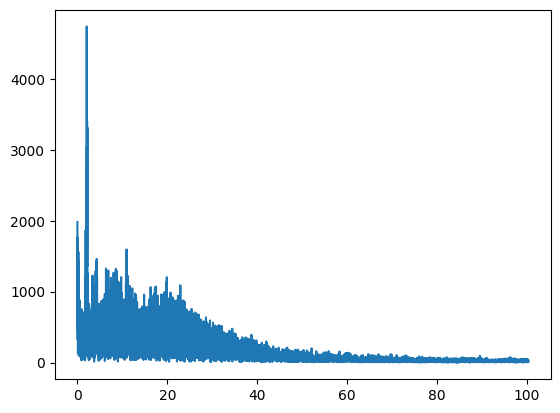

In [6]:
# Graficame el dominio frecuencial en hercios, amplitud
plt.plot(rfreqs, rfft_msg)

In [7]:
print('Frecuencia dominante', rfreqs[np.argmax(rfft_msg)])
print('PSD:',np.sum(rfft_msg))
print('Skewness:',df['Linear Acceleration x (m/s^2)'].skew())
print('Kurtosis:',df['Linear Acceleration x (m/s^2)'].kurtosis())

Frecuencia dominante 2.0746955789106596
PSD: 2136123.1993714217
Skewness: 0.3689826783103134
Kurtosis: 7.19603338253021


In [12]:
! sudo apt-get install python-scipy

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [10]:
from spicy.signal import get_window
window = get_window("hann",len(df),fftbins=True)
plt.plot(window)
# si multiplicamos esto a la fft para lograr esa periocididad que asume fourier


ModuleNotFoundError: No module named 'spicy'

In [ ]:
# Nos aseguramos que la transformada de fourir que lo haga correctamente
plt.show((df['Linear Acceleration x (m/s^2)']*window))

In [ ]:
# Aplicar fft sobre la señal
rfft_output = np.fft.rfft(df['Linear Acceleration x (m/s^2)']*window) 
# se pueden conseguir valores negativos
# para corregir esto tenemos que aplicar esta formula
rfft_msg = [np.sqrt(i.real**2 + i.imag**2) for i in rfft_output]
# obtener las frecuencias
rfreqs=[(i*1.0)/len(rfft_msg)*fs for i in range(len(rfft_msg))]

In [ ]:
# Ver si hay discepancias entre ambas señales
# Ahora la señal es periodica en el tiempo

print('Frecuencia dominante', rfreqs[np.argmax(rfft_msg)])
print('PSD:',np.sum(rfft_msg))
print('Skewness:',df['Linear Acceleration x (m/s^2)'].skew())
print('Kurtosis:',df['Linear Acceleration x (m/s^2)'].kurtosis())

In [13]:
#   hacer una funcion para hacerlo junto
def Myfft(Fs,X):
    from scipy
    window = get_window("hann",len(X),fftbins=True)
    X = X*window
    ##
    rfft_output = np.fft.rfft(X)
    rfft_msg = [np.sqrt(i.real**2 + i.imag**2) for i in rfft_output]
    num_samples = len(X)
    rfreqs=[(i*1.0)/num_samples*Fs for i in range(len(rfft_msg))]
    return rfreqs, rfft_msg

SyntaxError: invalid syntax (3341484081.py, line 3)

In [ ]:
def freq_features(raw_data,window_size=1000,step_size=500):
    data = []
    for i in range(0,len(raw_data)-window_size+1,step_size):

        window_data_X= raw_data.iloc[i:i+window_size,1]  # X_axis
        window_data_Y= raw_data.iloc[i:i+window_size,2]  # Y_axis
        window_data_Z= raw_data.iloc[i:i+window_size,3]  # Z_axis

        fft_mag_X = Myfft(fs,window_data_X)
        fft_mag_Y = Myfft(fs,window_data_Y)
        fft_mag_Z = Myfft(fs,window_data_Z)
        data.appeend([fft_freq[]])

In [14]:
! sudo apt-get install python3-scipy

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
